In [84]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import mglearn
from matplotlib import rc

C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
from matplotlib import rc
# define fonts
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
# define size of the plots
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

In [18]:
# read data from csv files
red_wine = pd. read_csv ("winequality-red.csv",sep=';')
white_wine = pd.read_csv ("winequality-white.csv",sep=';')

In [19]:
# # number of values for each kinds of the wine
num_value_red = len(red_wine)
num_value_white = len(white_wine)

In [20]:
#extract columns' names
column_name_red = red_wine.columns 
column_name_white = white_wine.columns 
# check if the red and white wines dataframes have silimiar columns
column_names = column_name_red

In [21]:
column_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
red_wine["wine_type"] =[1]*num_value_red  # to add a column indicating the type of wine, red wine representing with 1
white_wine["wine_type"] =[0]*num_value_white # to add a column indicating the type of wine, white wine representing with 0


# to put all red and white wine in a same dataframe
df = white_wine.append(red_wine, ignore_index = True)    

# to check null values 
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
wine_type               False
dtype: bool

In [24]:
# to check the dataframe 
print(df.tail())
# df.info()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  wine_type  
6492     10.5 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [31]:
# chose features of the model all the provided data except alcohol amount

X = df.drop(['alcohol'],axis = 1).values
y = df.alcohol
names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality', 'wine_type']
names2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol', 'quality'] 

In [32]:
# KNeighborRegressor 

# define X , y train and test with train_test_split comand
X_train,X_test,y_train,y_test = train_test_split (X, y, random_state = 120)
 # to check the datas
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape) 


(4872, 12) (1625, 12) (4872,) (1625,)


In [33]:
# define a function for KNeighbor regressor
def Kn_reg(N):
    # apply the model
    neighbor_reg = KNeighborsRegressor(n_neighbors = N)   # choes 10 as the number of neighbors
    neighbor_reg.fit(X_train,y_train)
    y_predict = (neighbor_reg.predict(X_test))
    print ("for {} neighbor, the training score is : {:.3f}".format(N, neighbor_reg.score(X_train,y_train)))
    print ("for {} neighbor, the test score is : {:.3f}".format(N, neighbor_reg.score(X_test,y_test)))
#     print("for {} neighbor, the predicted y is ={}". format(N, y_predict))
  

In [34]:
# check differnt n_neighbors
Kn_reg(10), Kn_reg(20), Kn_reg(50), Kn_reg(100)

for 10 neighbor, the training score is : 0.425
for 10 neighbor, the test score is : 0.276
for 20 neighbor, the training score is : 0.349
for 20 neighbor, the test score is : 0.258
for 50 neighbor, the training score is : 0.277
for 50 neighbor, the test score is : 0.239
for 100 neighbor, the training score is : 0.246
for 100 neighbor, the test score is : 0.227


(None, None, None, None)

In [35]:
#optimiztion based on the value of n_neighbors
test_accuracy = []
training_accuracy = []

neighbor_setting = list(range (1,100))
for n_neighbors in neighbor_setting:
    neighbor_regs = KNeighborsRegressor(n_neighbors = n_neighbors)
    neighbor_regs.fit(X_train,y_train)
    training_accuracy.append(neighbor_regs.score(X_train, y_train)) 
    test_accuracy.append(neighbor_regs.score(X_test,y_test))

In [36]:
# plot the accuracy versus n_neighbors
def plot_accuracy_neighor():
    plt.plot(neighbor_setting, training_accuracy, label = "Training accuracy")
    plt.plot(neighbor_setting, test_accuracy, label = "Test accuracy")
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.gca().invert_xaxis()
    plt.legend()
    



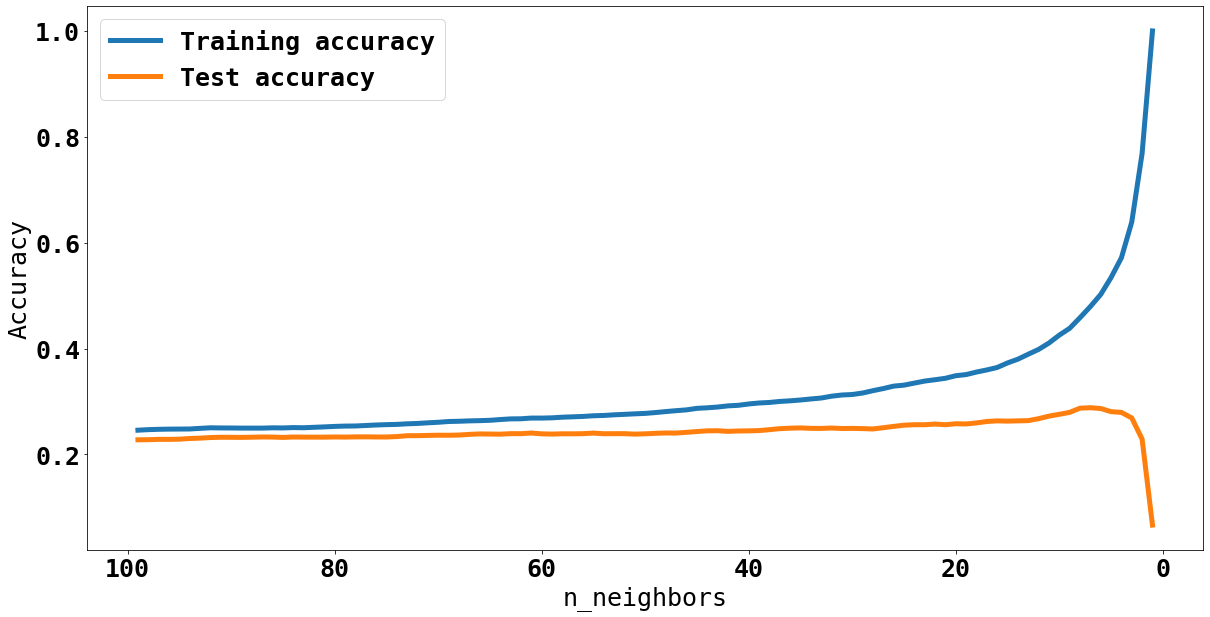

In [19]:
plot_accuracy_neighor()

### Kneighbor Regressor mthod :

For the first trail, all 12 columns of data for the wines including:
'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality' and 'wine_type' was selcted as the features, n_neighbors was defined to be 10, 20, 50,100 the accuracy of the model was: training score  : 
for 10 neighbor, the training score is : 0.425
for 10 neighbor, the test score is : 0.276

for 20 neighbor, the training score is : 0.349
for 20 neighbor, the test score is : 0.258

for 50 neighbor, the training score is : 0.277
for 50 neighbor, the test score is : 0.239

for 100 neighbor, the training score is : 0.246
for 100 neighbor, the test score is : 0.227
which is a poor result. 
The model was applied for 1 to 100 neighbors to find out the optimum value for n_neighbors, from the plot it is revealed that the accuracies do not imporve and from n_neighobrs = 50 they tend to have almost similar value of 0.23





In [37]:
X_n = df.loc[:,['residual sugar', 'free sulfur dioxide','total sulfur dioxide', 'density', 'wine_type']]
# define X , y train and test with train_test_split comand
X_train,X_test,y_train,y_test = train_test_split (X_n, y, random_state = 120)
# to check the datas
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_n.head()

(4872, 5) (1625, 5) (4872,) (1625,)


,residual sugar,free sulfur dioxide,total sulfur dioxide,density,wine_type
0,20.7,45.0,170.0,1.0010,0
1,1.6,14.0,132.0,0.9940,0
2,6.9,30.0,97.0,0.9951,0
3,8.5,47.0,186.0,0.9956,0
4,8.5,47.0,186.0,0.9956,0


In [38]:
# KNeighborRegressor 
# apply the model
# check differnt n_neighbors
Kn_reg(10), Kn_reg(20), Kn_reg(50), Kn_reg(100)

for 10 neighbor, the training score is : 0.362
for 10 neighbor, the test score is : 0.201
for 20 neighbor, the training score is : 0.302
for 20 neighbor, the test score is : 0.210
for 50 neighbor, the training score is : 0.254
for 50 neighbor, the test score is : 0.221
for 100 neighbor, the training score is : 0.232
for 100 neighbor, the test score is : 0.218


(None, None, None, None)

### Change the features parameters
Through a brief research, main factors in level of alcohol was mentioned to be suger and sulfur dioxide, the KNeigbor regressor was applied for differnt sets and they all show poorer result than even the previous case.  
for 10 neighbor, the training score is : 0.362
for 10 neighbor, the test score is : 0.201

for 20 neighbor, the training score is : 0.302
for 20 neighbor, the test score is : 0.210

for 50 neighbor, the training score is : 0.254
for 50 neighbor, the test score is : 0.221

for 100 neighbor, the training score is : 0.232
for 100 neighbor, the test score is : 0.218

In [39]:
# apply differnt linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

In [40]:
# Linear Regression
lr = LinearRegression().fit(X_train, y_train)
y_prediction_lr = lr.predict(X_test)
lr_coef = (lr.coef_).reshape(-1,1)
# print the accuracy result
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.82
Test set score: 0.85


In [41]:
# Applying Ridge model for differnt alphas
def L_ridge(Alpha):
    l_ridge = Ridge(alpha = Alpha).fit(X_train, y_train)# is the Ridge model with the defined alpha by the user
    y_prediction = l_ridge.predict(X_test)  # the predicted y(alcohol level) value
    s_train= l_ridge.score(X_train,y_train) # training accuracy 
    s_test = l_ridge.score(X_test,y_test)    # test acuuracy
    coef_ridge = l_ridge.coef_     # coefficient of the features in the model
    return y_prediction.ravel(), s_train, s_test, coef_ridge.ravel()  


In [42]:
# apply the Ridge model for differnt alphas:
y_prediction = {}
training_score = {}
test_score = {}
ridge_coef = {}

# a for loop is developed to obtain trainig and test scors for diffrent alphas as well as calculating predicted valu for y 
# and coeeficient of Rdge model for the designated alpha values
for alpha in [.0001, .001, .01, .1, 1, 10]:  
# the function "L_ridge " returns four parameters in cluding: predicted "y",  "trainig and test scors" and the coefficients
    y_prediction["alpha="+str(alpha)], training_score["training_score_ridge(alpha)="+str(alpha)] ,test_score["test_score_ridge"+str(alpha)], ridge_coef["alpha="+str(alpha)]= L_ridge(alpha)

# to changed the data type of  form object to numeric apply "pd.to_numeric: comand    
    y_prediction["alpha="+str(alpha)] = pd.to_numeric(y_prediction["alpha="+str(alpha)], errors = 'coerce')  
    ridge_coef["alpha="+str(alpha)] = pd.to_numeric( ridge_coef["alpha="+str(alpha)], errors = 'coerce') 

# introduce two dataframes for training and test scors     
train_score = pd.DataFrame({"Training Score":training_score})
test_score =  pd.DataFrame({"Test_score":test_score})

# key is a parameter introduced to have all the key of the dictionaries of y_prediction and ridge_coef 
key =  y_prediction.keys()
list_keys = [ k for k in key ]

# change y_prediction and ridge_coef from dictionary to dataframe
df_ypredict = pd.DataFrame(y_prediction, columns = list_keys) 
df_coef = pd.DataFrame(ridge_coef, columns = list_keys) 
   

In [43]:
print("training score for differnt values of alpha is:{}".format(train_score))
print("***************************************************")
print("test score for differnt values of alpha is:{}".format(test_score))

training score for differnt values of alpha is:                                    Training Score
training_score_ridge(alpha)=0.0001        0.817642
training_score_ridge(alpha)=0.001         0.810811
training_score_ridge(alpha)=0.01          0.674304
training_score_ridge(alpha)=0.1           0.472656
training_score_ridge(alpha)=1             0.429564
training_score_ridge(alpha)=10            0.406409
***************************************************
test score for differnt values of alpha is:                        Test_score
test_score_ridge0.0001    0.849161
test_score_ridge0.001     0.837457
test_score_ridge0.01      0.687684
test_score_ridge0.1       0.483030
test_score_ridge1         0.442429
test_score_ridge10        0.423215


### for several alphas the Ridge model is applied for all the features which is introduced as "names" 
The best result is for alpha = 0.0001, which show both training and test accurac of more than .8.Also in the following two differnt datframe is obtained indicating the predicted values for y(Alcohol) and coefficient of the Ridge model for all the features.  


In [44]:
df_ypredict.head()

,alpha=0.0001,alpha=0.001,alpha=0.01,alpha=0.1,alpha=1,alpha=10
0,11.914505,11.875422,11.718786,11.608323,11.590939,11.577858
1,11.277555,11.341554,11.597953,11.777371,11.792633,11.739562
2,9.523409,9.614778,9.980981,10.239508,10.282104,10.307296
3,9.188010,9.258575,9.541315,9.739647,9.762598,9.779592
4,9.593043,9.566910,9.461995,9.385317,9.351760,9.307688


In [45]:
df_coef.head()

,alpha=0.0001,alpha=0.001,alpha=0.01,alpha=0.1,alpha=1,alpha=10
0,0.503726,0.434267,0.155906,-0.040214,-0.068806,-0.065320
1,0.840283,0.912271,1.200299,1.396070,1.360018,1.034679
2,0.578603,0.630881,0.839881,0.979434,0.932830,0.663834
3,0.223854,0.188649,0.047545,-0.052091,-0.068419,-0.070139
4,-1.422977,-2.248738,-5.546169,-7.690003,-6.507079,-2.239129


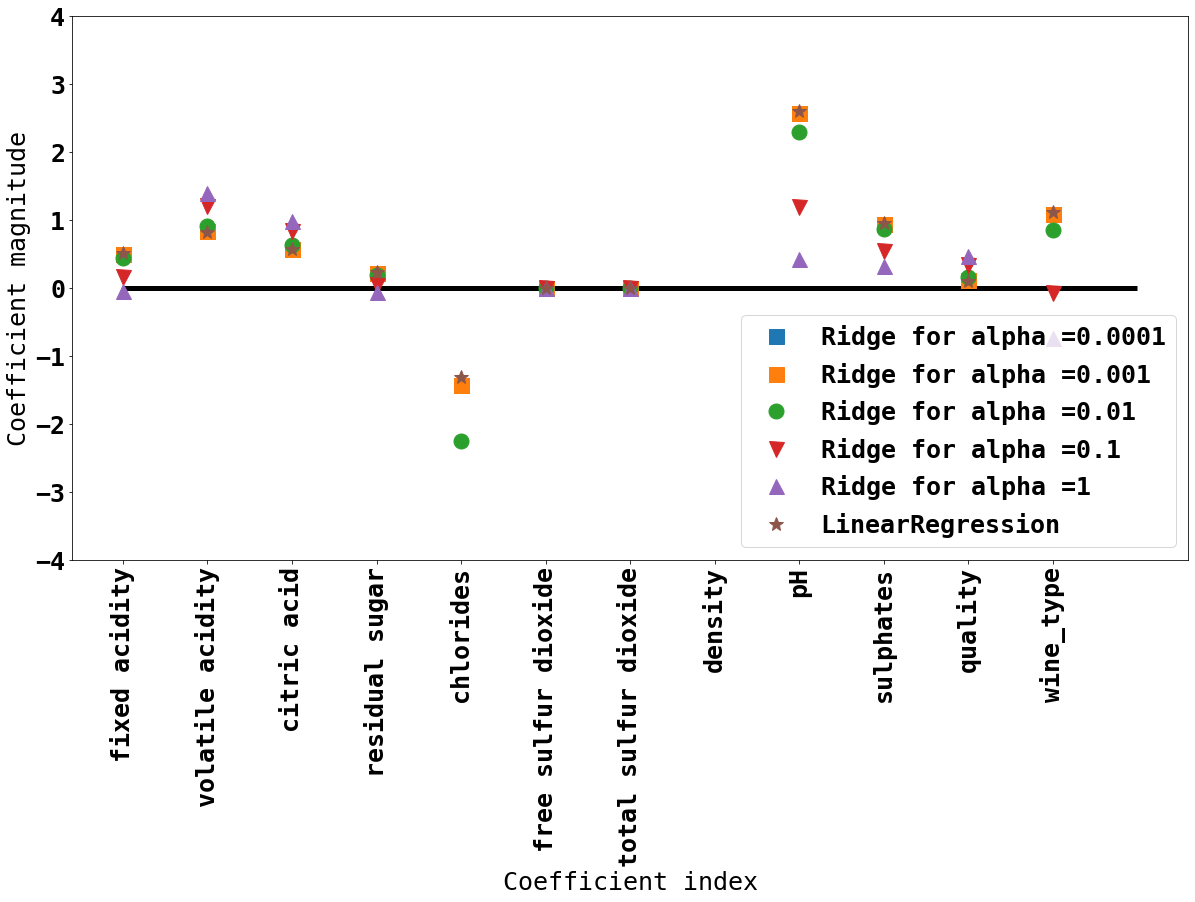

In [46]:
# to plot the coeficients of Ridge model for several differnt amounts of alphas and also coeficient of linear regression
plt.plot(df_coef.iloc[:,0],"s",label = "Ridge for alpha =0.0001")
plt.plot(df_coef.iloc[:,0],"s",label = "Ridge for alpha =0.001")
plt.plot(df_coef.iloc[:,1],"o",label = "Ridge for alpha =0.01")
plt.plot(df_coef.iloc[:,2],"v",label = "Ridge for alpha =0.1")
plt.plot(df_coef.iloc[:,3],"^",label = "Ridge for alpha =1")
plt.plot(lr_coef, '*', label="LinearRegression")
plt.xticks(range(len(names)), names, rotation=90)
plt.hlines(0, 0, range(len(names)))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr_coef))
plt.ylim(-4, 4)
plt.legend()

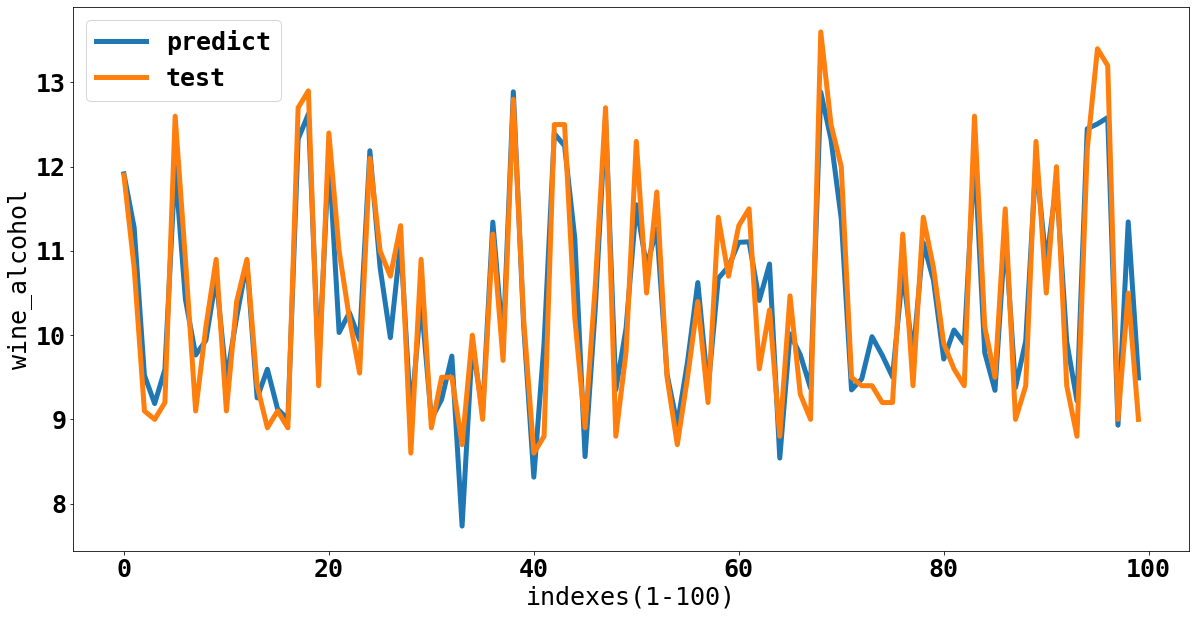

In [47]:
t = len(X_test)
predict_0001 = df_ypredict.iloc[:100,0]
y_test_plot = list(y_test.ravel()[:100])
plt.plot(list(range(0,100)), predict_0001, label = "predict")
plt.plot(list(range(0,100)), y_test_plot , label = "test")
plt.xlabel("indexes(1-100)")
plt.ylabel("wine_alcohol")
plt.legend()

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 


In [49]:
# intoduce features as X_bin which includs all the column_names except wine_type
X_bin = df.drop(["wine_type"], axis = 1).values
# consider y_bin as output which is the wine_type
y_bin = df.iloc[:,12].values

# split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, random_state=42)

In [50]:
# apply the logestic regression model as a binary calssification
def log_reg(c):
    logreg = LogisticRegression(C=c).fit(X_train, y_train)
    logreg_ypredict = logreg.predict(X_test) # predicted values for y 
    logreg_trainscore = logreg.score(X_train,y_train) # training accuracy 
    logreg_testscore = logreg.score(X_test,y_test)    # test acuuracy
    logreg_coef = logreg.coef_ # coefficient of the features in the model    
    return logreg_ypredict.ravel(), logreg_trainscore, logreg_testscore, logreg_coef.ravel()  

    
    

In [51]:
log_reg(10)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 0.9878899835796388,
 0.9833846153846154,
 array([  1.00570666,  11.54328418,  -0.49943798,  -0.12240379,
          9.33150004,   0.06105147,  -0.06735009, -11.2018042 ,
          5.48704519,   8.59190956,  -0.68095408,  -0.07494193]))

In [52]:
logreg_ypredict = {}
logreg_trainscore = {}
logreg_testscore = {}
logreg_coef = {}

# a for loop is developed to obtain trainig and test scors for diffrent c as well as calculating predicted valu for y 
# and coeeficient of Rdge model for the designated c values
for c in [ .1, 1, 10, 100]:
    # the function "L_ridge " returns four parameters in cluding: predicted "y",  "trainig and test scors" and the coefficients
    logreg_ypredict["c="+str(c)], logreg_trainscore["training_score_logestic_regression(c)="+str(c)] ,logreg_testscore["test_score_logestic_regression"+str(c)], logreg_coef["c="+str(c)]= log_reg(c)

# to changed the data type of  form object to numeric apply "pd.to_numeric: comand    
    logreg_ypredict["c="+str(c)] = pd.to_numeric(logreg_ypredict["c="+str(c)])  
    logreg_coef["c="+str(c)] = pd.to_numeric(logreg_coef["c="+str(c)]) 

# introduce two dataframes for training and test scors     
logreg_trainscore = pd.DataFrame({"Training Score":logreg_trainscore})
logreg_testscore =  pd.DataFrame({"Test_score":logreg_testscore })

# key is a parameter introduced to have all the key of the dictionaries of y_prediction and ridge_coef 
key =  logreg_ypredict.keys()
list_keys = [ k for k in key ]

# change y_prediction and ridge_coef from dictionary to dataframe
logreg_df_ypredict = pd.DataFrame(logreg_ypredict, columns = list_keys) 
logreg_df_coef = pd.DataFrame(logreg_coef, columns = list_keys)    

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
print("training score for differnt values of C is:{}".format(logreg_trainscore))
print("***************************************************")
print("test score for differnt values of C is:{}".format(logreg_testscore))




training score for differnt values of C is:                                           Training Score
training_score_logestic_regression(c)=0.1        0.971059
training_score_logestic_regression(c)=1          0.982553
training_score_logestic_regression(c)=10         0.987890
training_score_logestic_regression(c)=100        0.988916
***************************************************
test score for differnt values of C is:                                   Test_score
test_score_logestic_regression0.1    0.964308
test_score_logestic_regression1      0.976615
test_score_logestic_regression10     0.983385
test_score_logestic_regression100    0.985231


In [54]:
logreg_df_ypredict.head()

,c=0.1,c=1,c=10,c=100
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [55]:
logreg_df_coef.head()

,c=0.1,c=1,c=10,c=100
0,0.714147,0.683452,1.005707,1.303756
1,3.210138,8.139134,11.543284,13.210395
2,-0.815363,-0.887687,-0.499438,-0.142483
3,-0.150919,-0.147450,-0.122404,-0.102047
4,0.470516,2.359416,9.331500,18.706323


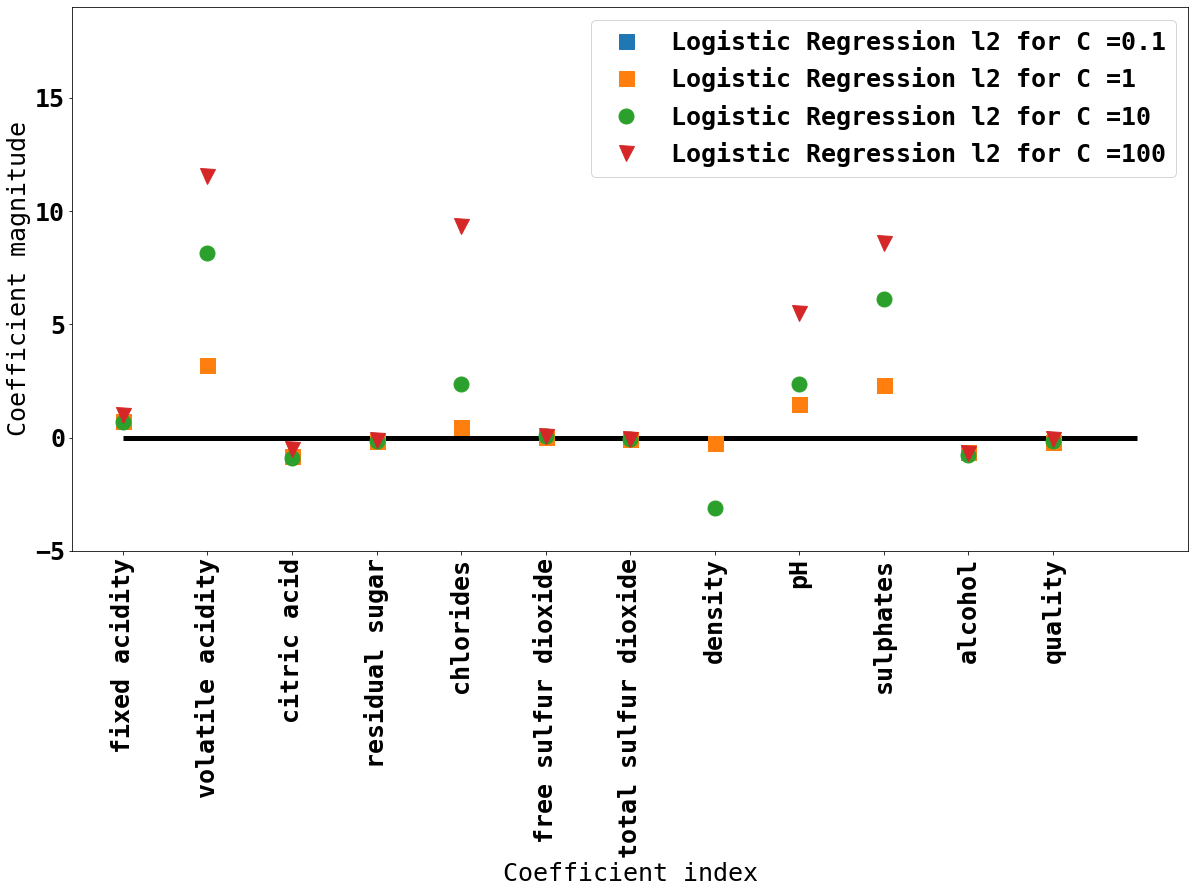

In [56]:
# to plot the coeficients of Ridge model for several differnt amounts of alphas and also coeficient of linear regression
plt.plot(logreg_df_coef.iloc[:,0],"s",label = "Logistic Regression l2 for C =0.1")
plt.plot(logreg_df_coef.iloc[:,0],"s",label = "Logistic Regression l2 for C =1")
plt.plot(logreg_df_coef.iloc[:,1],"o",label = "Logistic Regression l2 for C =10")
plt.plot(logreg_df_coef.iloc[:,2],"v",label = "Logistic Regression l2 for C =100")
# plt.plot(df_coef.iloc[:,3],"^",label = "Ridge for alpha =1")
# plt.plot(lr_coef, '*', label="LinearRegression")
plt.xticks(range(len(names2)), names2, rotation=90)
plt.hlines(0, 0, range(len(names2)))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr_coef))
plt.ylim(-5, 19)
plt.legend()

### C) multiclass classification to predict the quality of the wine on a test set

In [133]:
y_multi = df.quality.values
X_mul= df.iloc[:,:11]
X_mul['wine_type'] = (df.wine_type)
X_multi = X_mul.values

(0, 35)

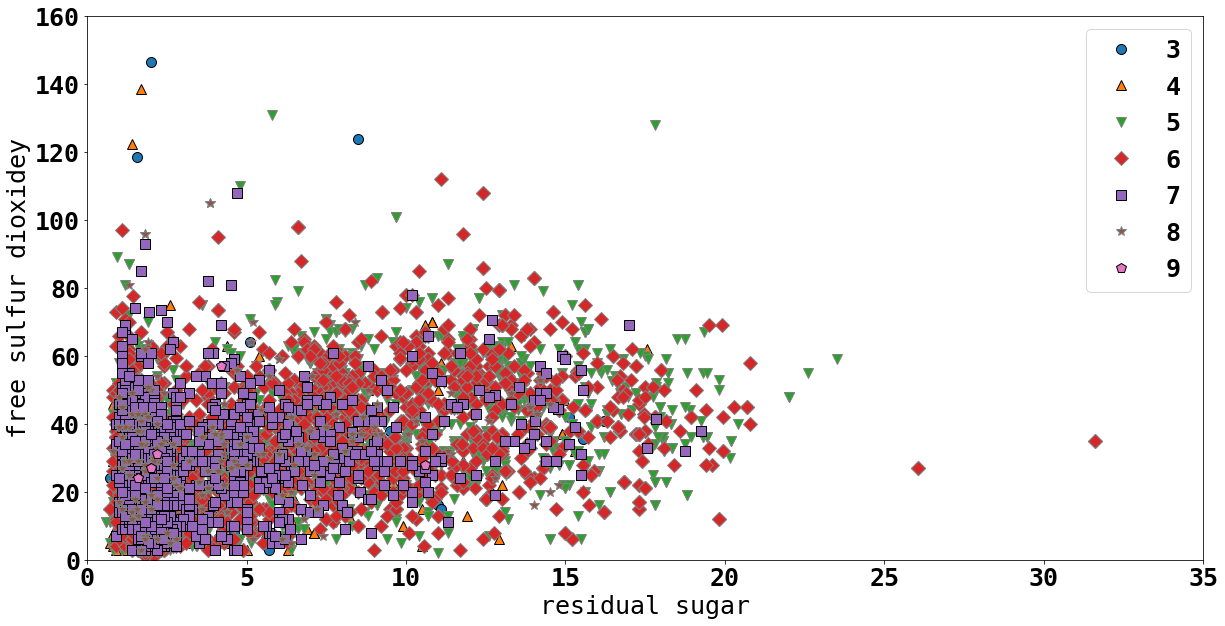

In [143]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type']

mglearn.discrete_scatter(X_multi[:,3], X_multi[:,5], y_mul)
plt.xlabel("residual sugar")
plt.ylabel("free sulfur dioxidey")
plt.legend(["3","4","5","6","7","8","9"])
plt.ylim(0, 160)
plt.xlim(0, 35)
 

In [135]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X_multi[:,3:6], y_multi)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (7, 3)
Intercept shape:  (7,)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


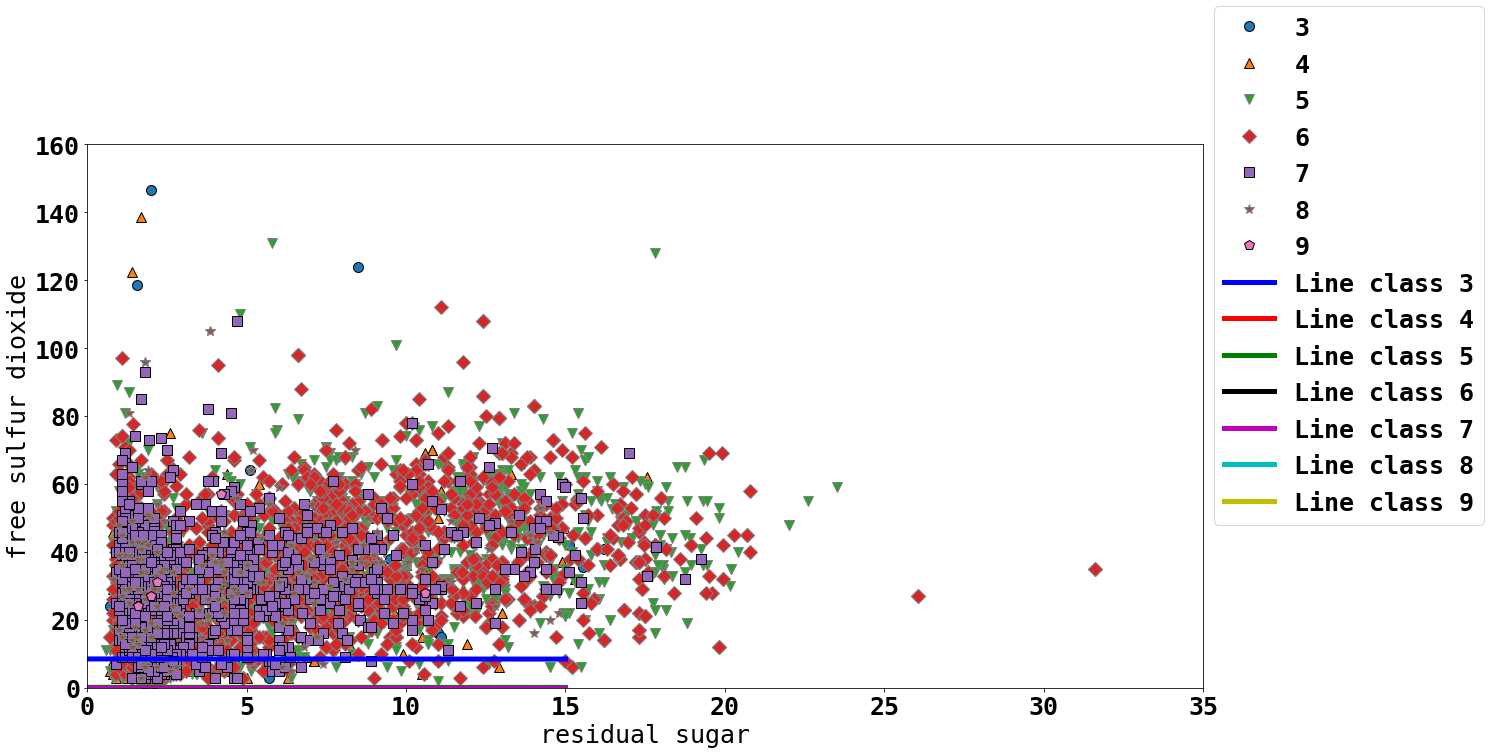

In [149]:
mglearn.discrete_scatter(X_multi[:, 3], X_multi[:, 5], y_mul)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g','k', 'm', "c" , 'y']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(0, 160)
plt.xlim(0, 35)
plt.xlabel(features[3])
plt.ylabel(features[5])
plt.legend(["3","4","5","6","7","8","9",'Line class 3', 'Line class 4',
'Line class 5', 'Line class 6', 'Line class 7', 'Line class 8', 'Line class 9'], loc=(1.01, 0.3))